# **Walmart Sales Analysis:**

Analysis of Walmart Sales data. We use Python for taking fruitful insights from given "Walmart Data" and answer the given recuried questions.



1.   Analyze the
performance of sales and revenue at the city and branch level
2.   What is the average price of an item sold at each branch of the city

1.   Analyze the performance of sales and revenue, Month over Month across the
Product line, Gender, and Payment Method, and identify the focus areas to
get better sales for April 2019.













*   App Exploration
*   Product Optimisation



# Importing libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# importing dataset

In [234]:
df = pd.read_excel('/content/Walmart Sales.xlsx')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [235]:
df.shape

(1000, 12)

# Checking null values with their percentage

In [236]:
pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/len(df)*100})

,Count,Percentage
Invoice ID,0,0.0
Branch,0,0.0
City,0,0.0
Customer type,0,0.0
Gender,0,0.0
Product line,0,0.0
Unit price,0,0.0
Quantity,0,0.0
Date,0,0.0
Time,0,0.0


In [237]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [238]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48:00,Ewallet
freq,1,343,340,501,501,178,20,7,345


In [239]:
df.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Time              object
Payment           object
Rating           float64
dtype: object

# checking sales

In [240]:
df['Sales'] = df['Quantity'] * df['Unit price']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


# 1. Analyze the performance of sales and revenue at the city and branch level

In [241]:
City_Sales = df.groupby('City')['Sales'].sum()

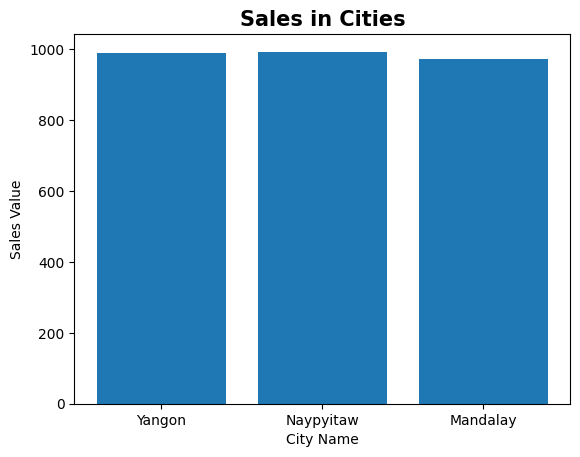

In [242]:
plt.bar(df['City'],df['Sales'])
plt.title('Sales in Cities',fontweight='bold',fontsize=15)
plt.xlabel('City Name')
plt.ylabel('Sales Value')
plt.show()

In [243]:
Branch_Sales = df.groupby('Branch')['Sales'].sum()
Branch_Sales

Branch
A    103763.00
B    107567.19
C     96257.19
Name: Sales, dtype: float64

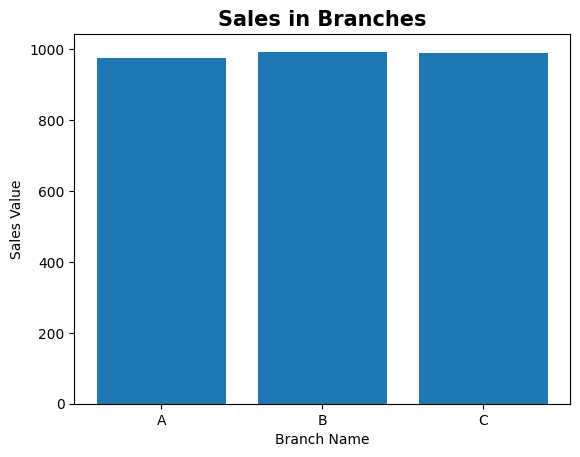

In [244]:
plt.bar(df['Branch'],df['Sales'])
plt.title('Sales in Branches',fontweight='bold',fontsize=15)
plt.xlabel('Branch Name')
plt.ylabel('Sales Value')
plt.show()

In [245]:
df['avg_price'] = df['Sales'] / df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales,avg_price
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,74.69
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,15.28
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,46.33
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,58.22
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,86.31


# 2. What is the average price of an item sold at each branch of the city

# Average Price of an item

In [246]:
Branch_avg_price = df.groupby('Branch')['avg_price'].sum()
Branch_avg_price

Branch
A    18645.54
B    19251.62
C    17774.97
Name: avg_price, dtype: float64

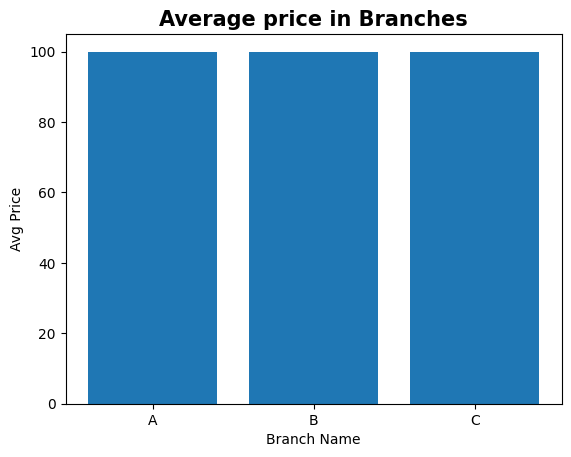

In [247]:
plt.bar(df['Branch'],df['avg_price'])
plt.title('Average price in Branches',fontweight='bold',fontsize=15)
plt.xlabel('Branch Name')
plt.ylabel('Avg Price')
plt.show()

# 3. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [248]:
'1/5/2019'.split('/')[0]

'1'

In [249]:
def month(x):
  return x.split('/')[0]

In [250]:
df['month'] = df['Date'].apply(month)

In [251]:
df.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Time              object
Payment           object
Rating           float64
Sales            float64
avg_price        float64
month             object
dtype: object

In [252]:
df['month'].unique()

array(['1', '3', '2'], dtype=object)

In [253]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales,avg_price,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,74.69,1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,15.28,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,46.33,3
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,58.22,1
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,86.31,2


In [254]:
df['month'] = df['month'].astype('int')

In [255]:
df.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Time              object
Payment           object
Rating           float64
Sales            float64
avg_price        float64
month              int64
dtype: object

In [256]:
Months_Sales = df.groupby('month')['Sales'].sum()
Months_Sales

month
1    110754.16
2     92589.88
3    104243.34
Name: Sales, dtype: float64

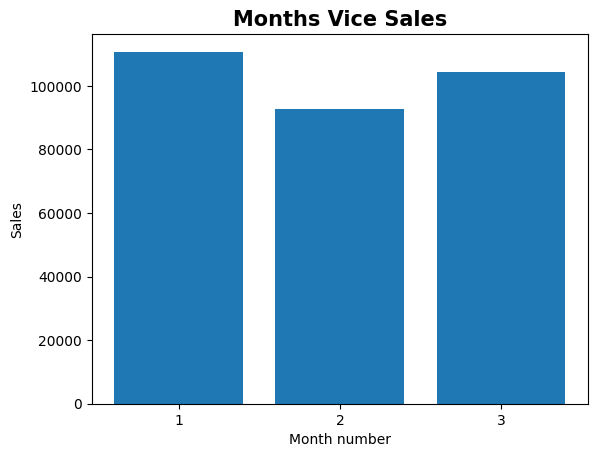

In [257]:
months = range(1,4)
plt.title('Months Vice Sales',fontweight='bold',fontsize=15)
plt.bar(months,Months_Sales)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.show()

In [258]:
df.groupby('Gender')['Gender'].count()

Gender
Female    501
Male      499
Name: Gender, dtype: int64

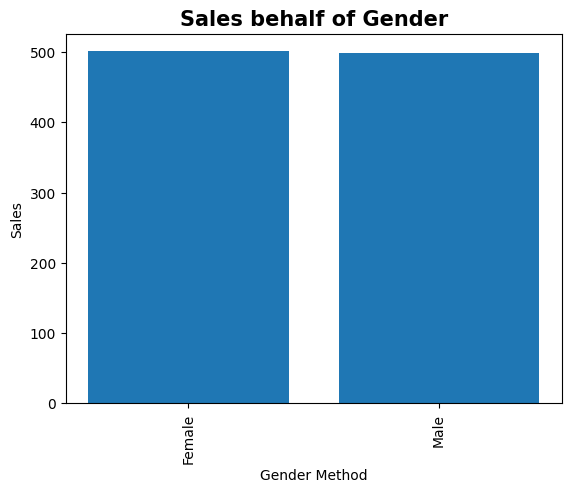

In [259]:
plt.bar(df.groupby('Gender')['Gender'].count().index,df.groupby('Gender')['Gender'].count())
plt.title('Sales behalf of Gender',fontweight='bold',fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('Gender Method')
plt.show()

In [230]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales,avg_price,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,2,9.1,522.83,74.69,1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,0,9.6,76.40,15.28,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,1,7.4,324.31,46.33,3
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,2,8.4,465.76,58.22,1
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,2,5.3,604.17,86.31,2


In [260]:
df.groupby('Payment')['Payment'].count()

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64

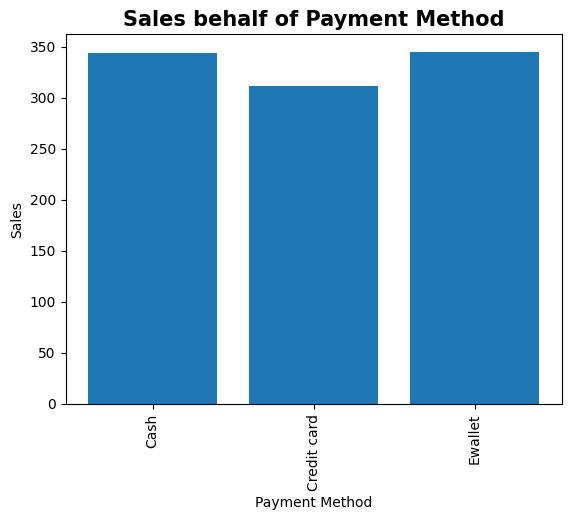

In [261]:
plt.bar(df.groupby('Payment')['Payment'].count().index,df.groupby('Payment')['Payment'].count())
plt.title('Sales behalf of Payment Method',fontweight='bold',fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('Payment Method')
plt.show()

# **Summary**

We did Data Analysis on this data and got many informations. We answered all the Questions which was asked to analysis and not only that we fetch more than that fruitful insights from data.



1.   We saw after our analysis that city 'Mandalay' has less Sale as Comapred to other cities. Much sales have been done in Naypyitaw and then Yangon.
2.   We also analysis that the Sale of Branch A is very low as compared to Branch A and B. Branch B has made highest sale and then Branch C have made sale.



All the questions are answered in this analysis avg_price of Sales in Branches and which Gender is did much purchasing and many more things.